# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [5]:
online_rt = pd.read_csv("C:\\Users\\375930\\Python\\Python Course\\Assignment\\2. Pandas Basic Exercises\\Exercise Data Files\\Pandas Exercise Online Retail files\\Online_Retail.csv",encoding='ISO-8859-1')

### Step 3. Assign it to a variable called online_rt

In [6]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [7]:
online_rt.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [18]:
import matplotlib as mlt
import matplotlib.pyplot as plt

In [19]:
a = online_rt[online_rt.Country != 'United Kingdom'].groupby("Country").Quantity.sum().reset_index()
a.sort_values(by="Quantity",ascending=False,inplace=True)
a[:10]

,Country,Quantity
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30325
31,Spain,26824
20,Japan,25218
3,Belgium,23152


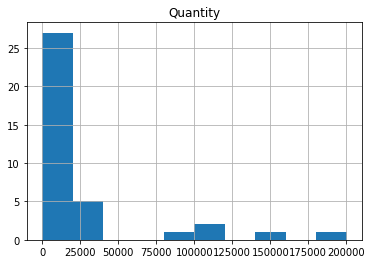

In [44]:
labels=a[:10].Country
a.hist("Quantity",label=labels)
plt.show()

### Step 5.  Exclude negative Quatity entries

In [28]:
online_rt_pos = online_rt[online_rt.Quantity > 0]
online_rt_pos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [66]:
online_rt["Quan_per_Price"] = online_rt.UnitPrice / online_rt.Quantity
b = online_rt[["Country","CustomerID","Quan_per_Price"]].groupby(["Country"]).Quan_per_Price.sum().reset_index()
b.sort_values(by="Quan_per_Price",ascending=False,inplace=True)

In [67]:
c = list(b[:3].Country)

In [68]:
c

['United Kingdom', 'France', 'EIRE']

In [84]:
d = online_rt.loc[(online_rt.Country == 'United Kingdom') | (online_rt.Country == 'France') | (online_rt.Country == 'EIRE'),["CustomerID","Country","Quan_per_Price"]].groupby(["Country","CustomerID"]).Quan_per_Price.sum().reset_index()
d.head()

,Country,CustomerID,Quan_per_Price
0,EIRE,14016.0,222.532468
1,EIRE,14156.0,619.737260
2,EIRE,14911.0,8917.538389
3,France,12413.0,66.808583
4,France,12437.0,296.953847


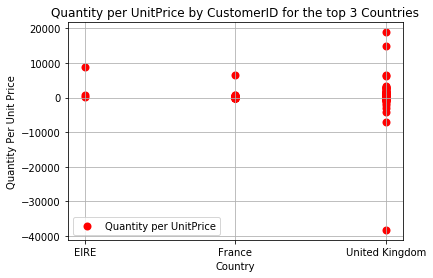

In [92]:
plt.scatter(data=d,x="Country",y="Quan_per_Price",label="Quantity per UnitPrice",marker='o',linewidths=2,color='r')
plt.legend(loc='lower left')
plt.grid(True)
plt.title('Quantity per UnitPrice by CustomerID for the top 3 Countries')
plt.xlabel('Country')
plt.ylabel('Quantity Per Unit Price')
plt.show()